<a href="https://colab.research.google.com/github/SinanYMC/bist_analiz/blob/main/RSI_Momentum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RSI Momentum Taraması

**Tanıtım:**
"RSI Momentum Taraması", piyasalarda güçlü momentum sinyallerini tespit etmek için geliştirilmiş, Python tabanlı yenilikçi bir tarama aracıdır. Bu araç, Göreceli Güç Endeksi (RSI) göstergesinin değişim hızını (RSI gradient) kullanarak, aşırı alım ve aşırı satım bölgelerindeki yüksek momentumlu alım ve satım sinyallerini belirler. Hacim filtresiyle desteklenen bu tarama, kullanıcıya güvenilir ve anlamlı analiz sonuçları sunar.

**Nasıl Çalışır?**
Bu araç, seçilen bir piyasa sembol listesi üzerinden aşağıdaki adımları uygular:

1. **Veri Toplama**:
   - `TvDatafeed` kütüphanesi aracılığıyla, belirlenen ana zaman dilimi (örneğin, günlük) için piyasa verilerini çeker.
   - Dış bir kaynaktan sembol listesi alarak taramanın güncel ve geniş kapsamlı olmasını sağlar.

2. **Teknik Analiz**:
   - RSI göstergesi hesaplanır ve RSI'nın değişim hızı (gradient) belirlenir; bu, momentumun gücünü ölçer.
   - Fiyatın en düşük ve en yüksek pivot noktaları belirlenerek, "Bullish" (alım) ve "Bearish" (satım) sinyalleri tespit edilir.
   - RSI'nın aşırı alım (70) ve aşırı satım (30) bölgelerinde olup olmadığı kontrol edilir.
   - Hacim verisi analiz edilir ve belirli bir hacim eşiğini karşılayan sinyaller seçilir.

3. **Filtreleme ve Görselleştirme**:
   - RSI gradienti belirlenen bir eşik değerin üzerinde ve RSI'nın aşırı alım/satım bölgelerinde olduğu sinyaller filtrelenir.
   - Hacim eşiğinin sağlandığı ve belirlenen diğer koşulları karşılayan semboller tarama sonuçlarına dahil edilir.
   - Sonuçlar `matplotlib` kullanılarak görselleştirilir, bu da kullanıcıların fiyat ve RSI grafikleri üzerinden sinyalleri anlamasını kolaylaştırır.

**Öne Çıkan Özellikler:**
- **Momentum Odaklı Sinyaller**: RSI gradientini kullanarak, güçlü momentum sinyalleri belirlenir.
- **Aşırı Alım/Satım Bölgeleri**: RSI'nın aşırı alım ve aşırı satım seviyelerinde olduğu durumları tespit ederek, daha güvenilir sinyalleri yakalar.
- **Hacim Teyidi**: Hacim filtresi sayesinde düşük hacimli ve daha az güvenilir sinyallerin elenmesi sağlanır.
- **Grafiksel Destek**: Tespit edilen sinyallerin fiyat ve RSI grafikleri üzerinden görselleştirilmesi, analiz sonuçlarının daha anlaşılır olmasını sağlar.

**Nasıl Kullanılır?**
1. Gerekli Python kütüphanelerini yükleyin (`tvDatafeed`, `pandas`, `ta`, `matplotlib`, vb.).
2. `TvDatafeed`'i kullanıcı adı ve şifrenizle başlatın.
3. Sembol listesini dış bir kaynaktan çekmek için URL'yi belirleyin.
4. Zaman dilimi, RSI ve hacim eşik değerlerini ihtiyaçlarınıza göre ayarlayın.
5. Scripti çalıştırarak sonuçları ve ilgili görselleştirmeleri görüntüleyin.

**Özet**:
"RSI Momentum Taraması", piyasa analizlerinizi daha verimli ve güçlü hale getirir. Momentumun yüksek olduğu ve güvenilir alım/satım sinyallerini tespit eden bu araç, yatırım kararlarınızda doğru ve zamanında bilgiler sağlar. Başarılı stratejiler oluşturmanıza ve piyasa hareketlerini daha iyi anlamanıza yardımcı olur.

*Not: Bu tarama aracı yalnızca eğitim ve bilgi amaçlıdır, yatırım tavsiyesi değildir. Yatırım yapmadan önce kendi araştırmanızı yapmanız ve finansal danışmanlık almanız önerilir.*


In [ ]:
!pip install git+https://github.com/rongardF/tvdatafeed ta mplfinance

ERROR:tvDatafeed.main:error while signin


Processing A1CAP with main timeframe Interval.in_4_hour...
Processing ADEL with main timeframe Interval.in_4_hour...
Processing ADESE with main timeframe Interval.in_4_hour...
Processing ADGYO with main timeframe Interval.in_4_hour...
Processing AEFES with main timeframe Interval.in_4_hour...
Processing AFYON with main timeframe Interval.in_4_hour...
Processing AGESA with main timeframe Interval.in_4_hour...
Processing AGHOL with main timeframe Interval.in_4_hour...
Processing AGROT with main timeframe Interval.in_4_hour...
Processing AHGAZ with main timeframe Interval.in_4_hour...
Processing AHSGY with main timeframe Interval.in_4_hour...
Processing AKBNK with main timeframe Interval.in_4_hour...
Processing AKCNS with main timeframe Interval.in_4_hour...
Processing AKENR with main timeframe Interval.in_4_hour...
Processing AKFGY with main timeframe Interval.in_4_hour...
Processing AKFYE with main timeframe Interval.in_4_hour...
Processing AKGRT with main timeframe Interval.in_4_hour..

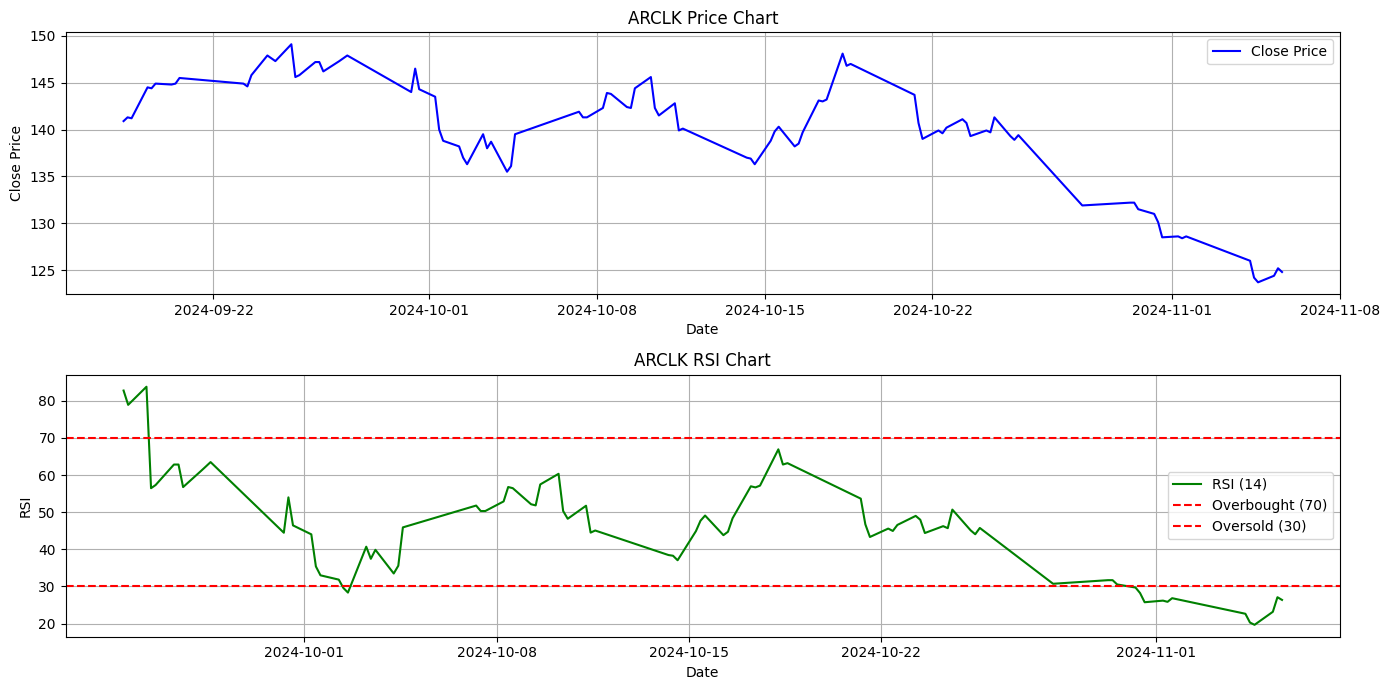

Symbol: FORMT, Condition: Bearish, Last Price: 5.11, RSI Gradient: 1.1410714989009278, RSI: 73.89228792986579, Volume: 5186805.0, Date: 2024-11-05 14:00:00


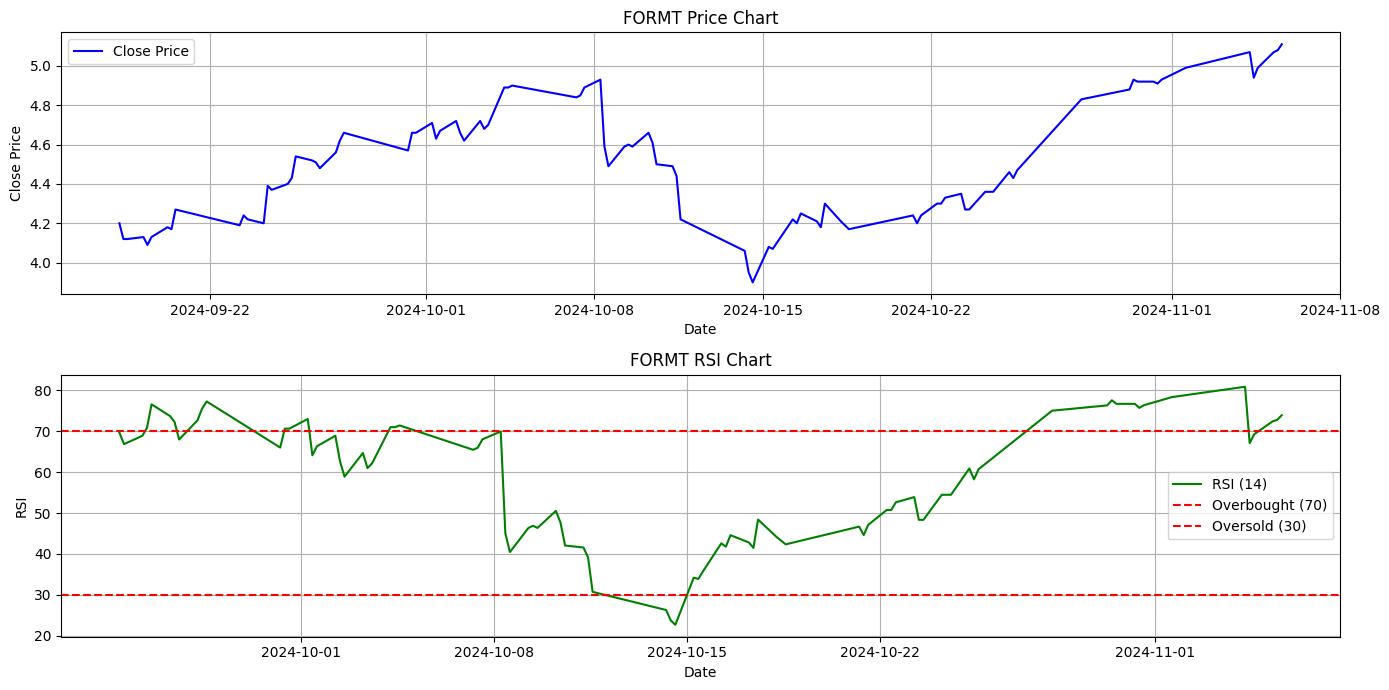

Symbol: KCHOL, Condition: Bullish, Last Price: 161.7, RSI Gradient: -0.9811826109303183, RSI: 28.264064588012786, Volume: 2925300.0, Date: 2024-11-05 14:00:00


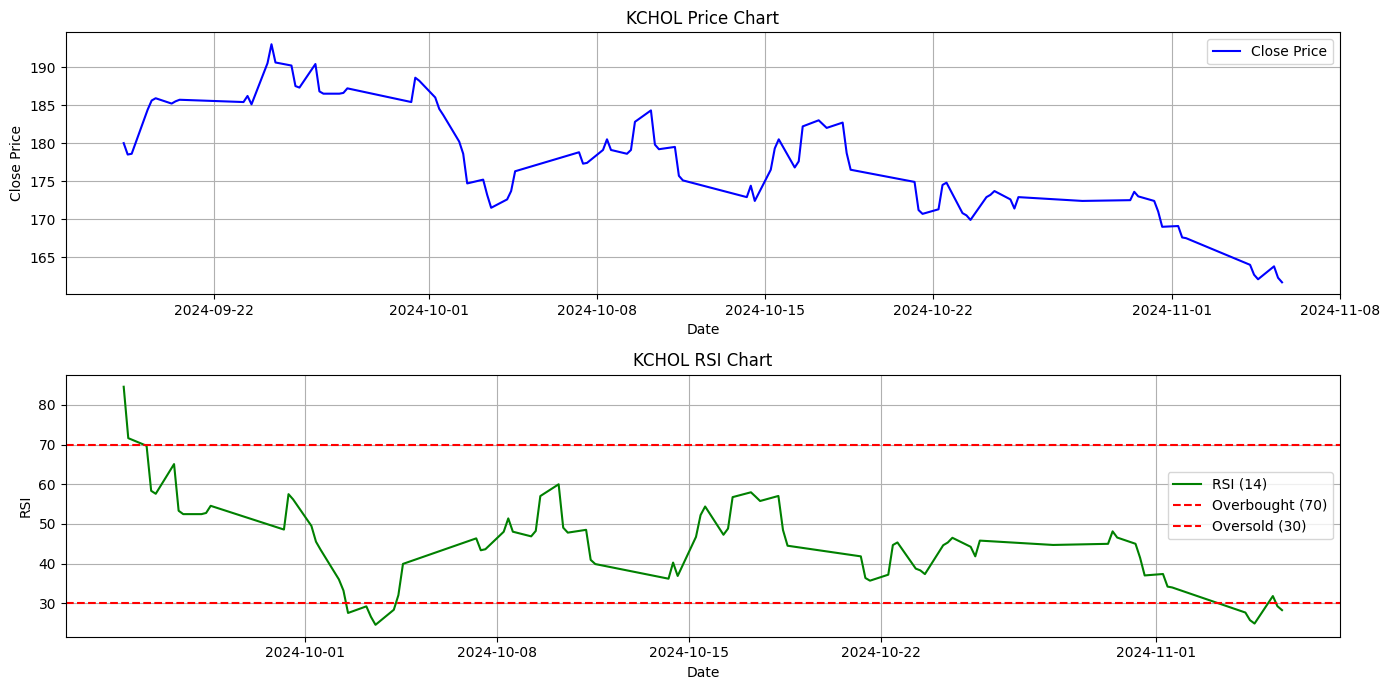

In [5]:
import numpy as np
import pandas as pd
from tvDatafeed import TvDatafeed, Interval
import ta
import warnings
import requests
import matplotlib.pyplot as plt

warnings.simplefilter(action='ignore')

# TvDatafeed başlatma (kullanıcı adı ve şifreyi girin)
tv = TvDatafeed(username='your_username', password='your_password')

# Parametreler
MAIN_TIMEFRAME = Interval.in_4_hour  # Ana sembol için zaman dilimi (4 saatlik)
MTF_TIMEFRAME = Interval.in_15_minute  # MTF analizi için zaman dilimi (15 dakikalık)
RSI_GRADIENT_THRESHOLD = 0.5  # RSI'nın değişim hızı için eşik değer
RSI_OVERBOUGHT = 70  # RSI aşırı alım seviyesi
RSI_OVERSOLD = 30  # RSI aşırı satım seviyesi
VOLUME_THRESHOLD = 100_000  # Minimum hacim eşiği
DATA_SOURCE_URL = "https://raw.githubusercontent.com/SinanYMC/bist_analiz/refs/heads/main/yildizpazar.txt"

# tvDatafeed'in desteklediği zaman periyotları:
# Interval.in_1_minute
# Interval.in_3_minute
# Interval.in_5_minute
# Interval.in_15_minute
# Interval.in_30_minute
# Interval.in_1_hour
# Interval.in_2_hour
# Interval.in_4_hour
# Interval.in_daily
# Interval.in_weekly
# Interval.in_monthly

def fetch_symbols_from_url(url):
    """Dış kaynaktan sembol listesini alır."""
    response = requests.get(url)
    response.raise_for_status()
    return response.text.splitlines()

def calculate_indicators(data):
    """RSI ve pivot seviyelerini hesaplar ve bull/bear koşullarını kontrol eder."""
    data['RSI'] = ta.momentum.rsi(data['close'], window=14)
    data['RSI_Gradient'] = data['RSI'].diff()  # RSI değişim hızı (gradient)
    data['Pivot_Low'] = data['low'].rolling(window=5).min()
    data['Pivot_High'] = data['high'].rolling(window=5).max()
    data['Bull_Condition'] = (data['RSI'] > data['RSI'].shift(5)) & (data['low'] < data['Pivot_Low'].shift(5))
    data['Bear_Condition'] = (data['RSI'] < data['RSI'].shift(5)) & (data['high'] > data['Pivot_High'].shift(5))
    return data

def get_and_analyze_data(symbol, interval):
    """Sembol için veri çekme ve analiz etme işlemini yapar."""
    data = tv.get_hist(symbol=symbol, exchange='BIST', interval=interval, n_bars=100)
    if data is not None and not data.empty:
        data = data.reset_index()
        return calculate_indicators(data)
    else:
        raise ValueError(f"Data not found for {symbol}")

def plot_results(data, symbol):
    """Fiyat ve RSI grafiğini çizer."""
    plt.figure(figsize=(14, 7))

    # Fiyat grafiği
    plt.subplot(2, 1, 1)
    plt.plot(data['datetime'], data['close'], label='Close Price', color='blue')
    plt.title(f"{symbol} Price Chart")
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.grid()
    plt.legend()

    # RSI grafiği
    plt.subplot(2, 1, 2)
    plt.plot(data['datetime'], data['RSI'], label='RSI (14)', color='green')
    plt.axhline(RSI_OVERBOUGHT, color='red', linestyle='--', label='Overbought (70)')
    plt.axhline(RSI_OVERSOLD, color='red', linestyle='--', label='Oversold (30)')
    plt.title(f"{symbol} RSI Chart")
    plt.xlabel('Date')
    plt.ylabel('RSI')
    plt.grid()
    plt.legend()

    plt.tight_layout()
    plt.show()

def main():
    """Ana tarama ve analiz fonksiyonu."""
    symbols = fetch_symbols_from_url(DATA_SOURCE_URL)
    results = []

    for symbol in symbols:
        try:
            print(f"Processing {symbol} with main timeframe {MAIN_TIMEFRAME}...")
            main_data = get_and_analyze_data(symbol, MAIN_TIMEFRAME)
            last_row = main_data.iloc[-1]

            # Filtreler:
            if (
                (last_row['Bull_Condition'] or last_row['Bear_Condition']) and
                abs(last_row['RSI_Gradient']) > RSI_GRADIENT_THRESHOLD and
                (last_row['RSI'] > RSI_OVERBOUGHT or last_row['RSI'] < RSI_OVERSOLD) and
                last_row['volume'] > VOLUME_THRESHOLD
            ):
                results.append({
                    'Symbol': symbol,
                    'Condition': 'Bullish' if last_row['Bull_Condition'] else 'Bearish',
                    'Last Price': last_row['close'],
                    'RSI Gradient': last_row['RSI_Gradient'],
                    'RSI': last_row['RSI'],
                    'Volume': last_row['volume'],
                    'Date': last_row['datetime']
                })

                print(f"Symbol: {symbol}, Condition: {'Bullish' if last_row['Bull_Condition'] else 'Bearish'}")

        except Exception as e:
            print(f"Error processing {symbol}: {e}")

    # Tarama tamamlandıktan sonra grafiklerin çizilmesi
    for result in results:
        print(f"Symbol: {result['Symbol']}, Condition: {result['Condition']}, Last Price: {result['Last Price']}, "
              f"RSI Gradient: {result['RSI Gradient']}, RSI: {result['RSI']}, Volume: {result['Volume']}, "
              f"Date: {result['Date']}")
        main_data = get_and_analyze_data(result['Symbol'], MAIN_TIMEFRAME)
        plot_results(main_data, result['Symbol'])

if __name__ == "__main__":
    main()
